# Titanic Data Set - Statistics Review

[Variable Descriptions](https://www.kaggle.com/c/titanic/data).

In [1]:
# Configure Jupyter notebook to plot inline
%matplotlib inline

In [2]:
# Import modules
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
# Read in titanic (training) data
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Describe the data. **
- How big?
- What are the columns and what do they mean?

In [4]:
# How big is the data frame?
rows, columns = titanic.shape
print("The data has {} rows and {} columns.".format(rows, columns))

The data has 891 rows and 12 columns.


In [5]:
# Data type by column name
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Describe data from each column
titanic.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Rice, Master. Arthur",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**What’s the average age of:**

- Any Titanic passenger
- A survivor
- A non-surviving first-class passenger
- Male survivors older than 30 from anywhere but Queenstown

In [7]:
# Calculate average ages
mean_age = titanic.Age.mean()
mean_survivor_age = titanic[titanic.Survived == 1].Age.mean()
mean_class1_nonsurvivor_age = titanic[(titanic.Pclass  == 1) & (titanic.Survived == 0)].Age.mean()
mean_male_survivor_over30_notQ = titanic[(titanic.Sex == 'male') & (titanic.Survived == 1) & \
                                         (titanic.Age > 30) & (titanic.Embarked != 'Q')].Age.mean()

# Print averages
print("Mean age of all Titanic passengers : {}".format(mean_age))
print("Mean age of a Titanic survivor : {}".format(mean_survivor_age))
print("Mean age of a non-surviving first-class passenger : {}".format(mean_class1_nonsurvivor_age))
print("Mean age of a male survivor over 30 not from Queenstown : {}".format(mean_male_survivor_over30_notQ))

Mean age of all Titanic passengers : 29.69911764705882
Mean age of a Titanic survivor : 28.343689655172415
Mean age of a non-surviving first-class passenger : 43.6953125
Mean age of a male survivor over 30 not from Queenstown : 41.48780487804878


**For the groups from the previous task, how far (in years) are the average ages from the median ages?**

In [8]:
# Calculate median ages
median_age = titanic.Age.median()
median_survivor_age = titanic[titanic.Survived == 1].Age.median()
median_class1_nonsurvivor_age = titanic[(titanic.Pclass  == 1) & (titanic.Survived == 0)].Age.median()
median_male_survivor_over30_notQ = titanic[(titanic.Sex == 'male') & (titanic.Survived == 1) & \
                                           (titanic.Age > 30) & (titanic.Embarked != 'Q')].Age.median()

# Print medians
print("Median age of all Titanic passengers : {}".format(median_age))
print("Median age of a Titanic survivor : {}".format(median_survivor_age))
print("Median age of a non-surviving first-class passenger : {}".format(median_class1_nonsurvivor_age))
print("Median age of a male survivor over 30 not from Queenstown : {}".format(median_male_survivor_over30_notQ))

Median age of all Titanic passengers : 28.0
Median age of a Titanic survivor : 28.0
Median age of a non-surviving first-class passenger : 45.25
Median age of a male survivor over 30 not from Queenstown : 38.0


In [9]:
# Calculate differences between means and medians for each group
age_diff = mean_age - median_age
survivor_age_diff = mean_survivor_age - median_survivor_age
class1_nonsurvivor_age_diff = mean_class1_nonsurvivor_age - median_class1_nonsurvivor_age
male_survivor_over30_notQ_diff = mean_male_survivor_over30_notQ - median_male_survivor_over30_notQ

# Print difference between average and median for each group
print("Differences between averages and medians:")
print("All passengers : {}".format(age_diff))
print("All survivors : {}".format(survivor_age_diff))
print("Non-surviving first-class passengers : {}".format(class1_nonsurvivor_age_diff))
print("Male survivors over 30 not from Queenstown : {}".format(male_survivor_over30_notQ_diff))

Differences between averages and medians:
All passengers : 1.69911764705882
All survivors : 0.34368965517241534
Non-surviving first-class passengers : -1.5546875
Male survivors over 30 not from Queenstown : 3.4878048780487774


**What’s the most common:**
- Passenger class
- Port of Embarkation
- Number of siblings or spouses aboard for survivors

In [10]:
# Calculate most common == mode for each request
passenger_mode = titanic.Pclass.mode()[0]
embark_mode = titanic.Embarked.mode()[0]
sibsp_survivor_mode = titanic[titanic.Survived == 1].SibSp.mode()[0]

# Print results
print("Most common passenger class : {}".format(passenger_mode))
print("Most common port of embarkation : {}".format(embark_mode))
print("Most common number of siblings/spouses aboard for survivors : {}".format(sibsp_survivor_mode))

Most common passenger class : 3
Most common port of embarkation : S
Most common number of siblings/spouses aboard for survivors : 0


**Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price? Is it above or below the mean?**

In [11]:
# Calculate mean and median ticket prices, along with standard deviation
mean_price = titanic.Fare.mean()
median_price = titanic.Fare.median()
stdev_price = titanic.Fare.std()

# Calculate range of standard deviations from the mean for the median ticket price
zscore = (median_price - mean_price) / stdev_price
bottom_range = math.floor(abs(zscore))
top_range = math.ceil(abs(zscore))

# Answer question
print("The median fare is between {} and {} standard deviations from the mean.".format(bottom_range, top_range))

The median fare is between 0 and 1 standard deviations from the mean.


**How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?**

In [12]:
# Determine price of 90th percentile and 5th percentile tickets
fare_90th = np.percentile(titanic.Fare, 90)
fare_5th = np.percentile(titanic.Fare, 5)
print("The difference between the 90th and 5th percentile tickets was: ${:.2f}.".format(fare_90th - fare_5th))

# Determine the port of each percentile fare
fares_sorted = titanic.sort_values(['Fare'])
def percentile_class(percentile):
    index = len(fares_sorted) * percentile // 100
    return fares_sorted.iloc[index].Pclass
print("The 90% fare came from class {}.".format(percentile_class(90)))
print("The 5% fare came from class {}.".format(percentile_class(5)))

The difference between the 90th and 5th percentile tickets was: $70.73.
The 90% fare came from class 1.
The 5% fare came from class 3.


**The highest average ticket price was paid by passengers from which port? Null ports don’t count.**

In [13]:
# Select rows containing a valid port value
port_df = titanic[titanic['Embarked'].notnull()]

# Group by port
port_groups = port_df.groupby(port_df.Embarked)

# Average ticket price by port
avg_port_fares = port_groups.Fare.mean()
max_port = avg_port_fares.idxmax()
max_avg = avg_port_fares.max()
port_codes = { 'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton' }
print("The highest average fare was ${:.2f}, paid by passengers from {}.".format(max_avg, port_codes[max_port]))

The highest average fare was $59.95, paid by passengers from Cherbourg.


**What is the most common passenger class for each port?**

In [14]:
# Get passenger class modes per port group
port_class_mode = titanic.groupby(titanic.Embarked).Pclass.apply(lambda x: x.mode()[0])
print("The most common passenger class from Cherbourg is: {}.".format(port_class_mode['C']))
print("The most common passenger class from Queenstown is: {}.".format(port_class_mode['Q']))
print("The most common passenger class from Southampton is: {}.".format(port_class_mode['S']))

The most common passenger class from Cherbourg is: 1.
The most common passenger class from Queenstown is: 3.
The most common passenger class from Southampton is: 3.


**What fraction of surviving 1st-class males paid lower than double the overall median ticket price?**

In [15]:
# Who were the surviving 1st class males?
surviving_class1_males = titanic[(titanic.Sex == "male") & (titanic.Survived == 1) & (titanic.Pclass == 1)]

# Which among these paid lower than double the overall median ticket price (calculated above)?
low_fare_group = surviving_class1_males[surviving_class1_males.Fare < (median_price * 2)]
low_fare_fraction = low_fare_group.PassengerId.count() / surviving_class1_males.PassengerId.count()
print("Proportion of surviving 1st class men who paid < 2x overall median fare: {:.2f}".format(low_fare_fraction))

Proportion of surviving 1st class men who paid < 2x overall median fare: 0.24


**How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?**

In [16]:
# Select rows containing a valid age value
age_df = titanic.dropna(subset=['Age']) 

# Split dataframe into survivors with family members and non-survivors without family members
survivor_has_fam = age_df[(age_df.Survived == 1) & ((age_df.SibSp > 0) | (age_df.Parch > 0))]
nonsurvivor_no_fam = age_df[(age_df.Survived == 0) & ((age_df.SibSp == 0) | (age_df.Parch == 0))]

# Identify mean ages of each group
survivor_has_fam_meanAge = survivor_has_fam.Age.mean()
nonsurvivor_no_fam_meanAge = nonsurvivor_no_fam.Age.mean()

# Older or younger? And by how much?
if survivor_has_fam_meanAge < nonsurvivor_no_fam_meanAge:
    diff = nonsurvivor_no_fam_meanAge - survivor_has_fam_meanAge
    print("The avg survivor with family was {:.1f} years younger than a non-survivor without family.".format(diff))
elif survivor_has_fam_meanAge > nonsurvivor_no_fam_meanAge:
    diff = survivor_has_fam_meanAge - nonsurvivor_no_fam_meanAge
    print("The avg survivor with family was {:.1f} years older than a non-survivor without family.".format(diff))
else:
    print("The avg survivor with family was the same age as the avg non-survivor without family.")

The avg survivor with family was 6.8 years younger than a non-survivor without family.


**Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles.**
- To be clearer, what I want is for you to specify 20 quantiles, and for each of those quantiles divide the number of survivors in that quantile by the total number of people in that quantile. That’ll give you the survival rate in that quantile.
- Then plot a line of the survival rate against the ticket fare quantiles.
- Make sure you label your axes.

In [17]:
# Specify 20 fare quantiles
total = len(fares_sorted)
breaks = 20
span = math.ceil(total / breaks)

# Calculate survival rates (number of survivors in each quartile by total number of people in each quartile)
survival_rates = pd.Series()
for i in range(0, total, span):
    end = (i + (span - 1)) if (i + span) < total else (total - 1)
    quantile = fares_sorted.iloc[i:end]
    rate = len(quantile[quantile.Survived == 1]) / len(quantile)
    label = "{:.2f} : {:.2f}".format(fares_sorted.iloc[i]['Fare'], fares_sorted.iloc[end]['Fare'])
    survival_rates[label] = rate
survival_rates

0.00 : 7.22        0.068182
7.22 : 7.55        0.181818
7.55 : 7.75        0.318182
7.75 : 7.88        0.272727
7.88 : 7.92        0.136364
7.92 : 8.05        0.227273
8.05 : 9.22        0.136364
9.22 : 10.50       0.272727
10.50 : 13.00      0.500000
13.00 : 14.46      0.340909
14.50 : 16.70      0.409091
16.70 : 23.00      0.477273
23.00 : 26.00      0.409091
26.00 : 27.75      0.568182
27.75 : 31.27      0.363636
31.27 : 42.40      0.409091
46.90 : 57.00      0.545455
57.00 : 79.20      0.545455
79.20 : 133.65     0.795455
134.50 : 512.33    0.714286
dtype: float64

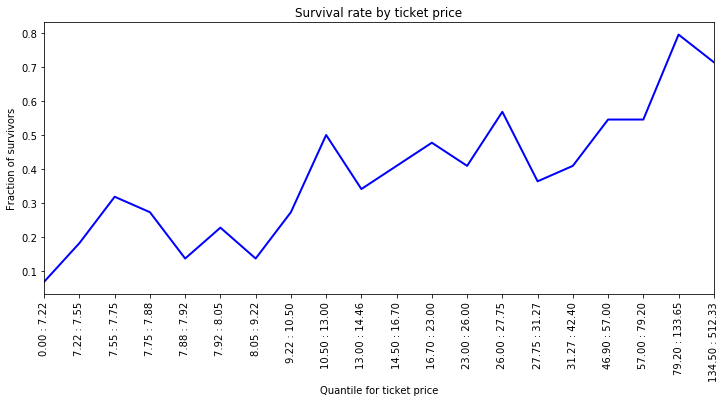

In [18]:
# Plot survival rate vs ticket fare quantiles
survival_rates.plot(figsize = (12, 5), xticks = range(0, 20), rot = 90, color = 'blue', linewidth = 2.0)
plt.ylabel('Fraction of survivors')
plt.xlabel('Quantile for ticket price')
plt.title('Survival rate by ticket price');

**For each of the following characteristics, find the median in the data:**
- Age
- Ticket price
- Siblings/spouses
- Parents/children

In [19]:
# Median characteristics
median_age = titanic.Age.median()
median_fare = titanic.Fare.median()
median_sibsp = titanic.SibSp.median()
median_parch = titanic.Parch.median()

# Print results
print("Median age: {}".format(median_age))
print("Median ticket price: {}".format(median_fare))
print("Median number of siblings/spouses: {}".format(median_sibsp))
print("Median number of parents/children: {}".format(median_parch))

Median age: 28.0
Median ticket price: 14.4542
Median number of siblings/spouses: 0.0
Median number of parents/children: 0.0


**If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, which of these characteristics would be the best choice and why?**

In [20]:
# Find samples at/below and above median for age
below_med_age = titanic[titanic.Age <= median_age]
above_med_age = titanic[titanic.Age > median_age]

# Calculate survival rates for each group
survRate_belowMedAge = len(below_med_age[below_med_age.Survived == 1]) / len(below_med_age)
survRate_aboveMedAge = len(above_med_age[above_med_age.Survived == 1]) / len(above_med_age)

# Print results
print("Below median age: {}".format(survRate_belowMedAge))
print("Above median age: {}".format(survRate_aboveMedAge))
print("Difference (above - below): {}".format(survRate_aboveMedAge - survRate_belowMedAge))

Below median age: 0.4088397790055249
Above median age: 0.4034090909090909
Difference (above - below): -0.005430688096433989


In [21]:
# Find samples at/below and above median for ticket price
below_med_fare = titanic[titanic.Fare <= median_fare]
above_med_fare = titanic[titanic.Fare > median_fare]

# Calculate survival rates for each group
survRate_belowMedFare = len(below_med_fare[below_med_fare.Survived == 1]) / len(below_med_fare)
survRate_aboveMedFare = len(above_med_fare[above_med_fare.Survived == 1]) / len(above_med_fare)

# Print results
print("Below median ticket price: {}".format(survRate_belowMedFare))
print("Above median ticket price: {}".format(survRate_aboveMedFare))
print("Difference (above - below): {}".format(survRate_aboveMedFare - survRate_belowMedFare))

Below median ticket price: 0.2505592841163311
Above median ticket price: 0.5180180180180181
Difference (above - below): 0.26745873390168695


In [22]:
# Find samples at/below and above median for number of siblings/spouses
below_med_sibsp = titanic[titanic.SibSp <= median_sibsp]
above_med_sibsp = titanic[titanic.SibSp > median_sibsp]

# Calculate survival rates for each group
survRate_belowMedSibSp = len(below_med_sibsp[below_med_sibsp.Survived == 1]) / len(below_med_sibsp)
survRate_aboveMedSibSp = len(above_med_sibsp[above_med_sibsp.Survived == 1]) / len(above_med_sibsp)

# Print results
print("Below median number of siblings/spouses: {}".format(survRate_belowMedSibSp))
print("Above median number of siblings/spouses: {}".format(survRate_aboveMedSibSp))
print("Difference (above - below): {}".format(survRate_aboveMedSibSp - survRate_belowMedSibSp))

Below median number of siblings/spouses: 0.34539473684210525
Above median number of siblings/spouses: 0.4664310954063604
Difference (above - below): 0.12103635856425515


In [23]:
# Find samples at/below and above median for number of parents/children
below_med_parch = titanic[titanic.Parch <= median_parch]
above_med_parch = titanic[titanic.Parch > median_parch]

# Calculate survival rates for each group
survRate_belowMedParch = len(below_med_parch[below_med_parch.Survived == 1]) / len(below_med_parch)
survRate_aboveMedParch = len(above_med_parch[above_med_parch.Survived == 1]) / len(above_med_parch)

# Print results
print("Below median number of parents/children: {}".format(survRate_belowMedParch))
print("Above median number of parents/children: {}".format(survRate_aboveMedParch))
print("Difference (above - below): {}".format(survRate_aboveMedParch - survRate_belowMedParch))

Below median number of parents/children: 0.34365781710914456
Above median number of parents/children: 0.5117370892018779
Difference (above - below): 0.16807927209273332


**Plot the distribution of passenger ages. Choose visually-meaningful bin sizes and label your axes.**

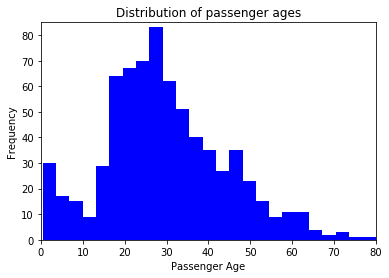

In [24]:
# Plot histogram of passenger ages
plt.hist(age_df.Age, bins = 25, color = 'blue')
plt.axis([0, 80, 0, 85])
plt.xlabel('Passenger Age')
plt.ylabel('Frequency')
plt.title('Distribution of passenger ages');

**Find the probability that:**
- A passenger survived
- A passenger was male
- A passenger was female and had at least one sibling or spouse on board
- A survivor was from Cherbourg
- A passenger was less than 10 years old
- A passenger was between 25 and 40 years old
- A passenger was either younger than 20 years old or older than 50

In [25]:
# Probability that a passenger survived
survived_prob = len(titanic[titanic.Survived == 1]) / len(titanic)
survived_prob

0.3838383838383838

In [26]:
# Probability that a passenger was male
male_prob = len(titanic[titanic.Sex == 'male']) / len(titanic)
male_prob

0.6475869809203143

In [27]:
# Probability that a passenger was female and had at least one sibling or spouse on board
female_sibsp_prob = len(titanic[(titanic.Sex == 'female') & (titanic.SibSp >= 1)]) / len(titanic)
female_sibsp_prob

0.15712682379349047

In [28]:
# Probability that a survivor was from Cherbourg
survivor = titanic[titanic.Survived == 1]
survivor_C_prob = len(survivor[survivor.Embarked == 'C']) / len(survivor)
survivor_C_prob

0.2719298245614035

In [29]:
# Probability that a passenger was less than 10 years old
under10_prob = len(titanic[titanic.Age < 10]) / len(titanic)
under10_prob

0.06958473625140292

In [30]:
# Probability that a passenger was between 25 and 40 years old
between25and40_prob = len(titanic[(titanic.Age >= 25) & (titanic.Age <= 40)]) / len(titanic)
between25and40_prob

0.32098765432098764

In [31]:
# Probability that a passenger was either younger than 20 years old or older than 50
under20_over50_prob = len(titanic[(titanic.Age < 20) | (titanic.Age > 50)]) / len(titanic)
under20_over50_prob

0.2558922558922559

**Knowing nothing else about the passengers aside from the survival rate of the population (see question above), if I choose 100 passengers at random from the passenger list, what’s the probability that exactly 42 passengers survive?**

In [32]:
stats.binom.pmf(k = 42, n = 100, p = survived_prob)

0.061330411815167886

**What’s the probability that at least 42 of those 100 passengers survive?**

In [33]:
prob_atLeast42 = 1 - stats.binom.cdf(k = 41, n = 100, p = survived_prob)
prob_atLeast42

0.25940724207261701

**Take random samples of 100 passengers and find out how many you need before the fraction of those samples where at least 42 passengers survive matches the probability you calculated previously (within Δp≈0.05).**

Answers will vary based on chosen seeds. What would happen if you drew every sample with the same seed?

Plot the survival fraction vs the number of random samples.

In [34]:
# Set up data frame to hold results
samples = pd.DataFrame(index = ['survivors', 'at_least_42', 'cum_fraction'])
cum_fraction = 0

# Iterate until cumulative fraction matches previous calculation within tolerance
seed = 1
index = 1
while abs(cum_fraction - prob_atLeast42) >= 0.05:
    sample = titanic.sample(n = 100, random_state = seed)
    survivors = sample.Survived.sum()
    at_least_42 = survivors >= 42
    n_prev_successes = samples.transpose()['at_least_42'].sum()
    cum_fraction = (at_least_42 + n_prev_successes) / (1 + len(samples.columns))
    samples[index] = [survivors, at_least_42, cum_fraction]
    index += 1
    seed += 1
    
print("It took {} iterations to reach a cumulative fraction of {}.".format(index - 1, cum_fraction))

It took 4 iterations to reach a cumulative fraction of 0.25.


**Is there a statistically significant difference between:**
- The ages of male and female survivors?
- The fares paid by passengers from Queenstown and the passengers from Cherbourg?

**Use a 95% confidence level.**

In [35]:
# Ages of male and female survivors
male_survivors = age_df[(age_df.Sex == 'male') & (age_df.Survived == 1)]
female_survivors = age_df[(age_df.Sex == 'female') & (age_df.Survived == 1)]
stats.ttest_ind(a = male_survivors.Age, b = female_survivors.Age, equal_var = False)

Ttest_indResult(statistic=-0.79089662277024664, pvalue=0.43018823932007377)

In [36]:
# Fares paid by passengers from Queenstown and passengers from Cherbourg
Q_passengers = titanic[titanic.Embarked == 'Q']
C_passengers = titanic[titanic.Embarked == 'C']
stats.ttest_ind(a = Q_passengers.Fare, b = C_passengers.Fare, equal_var = False)

Ttest_indResult(statistic=-6.9951971047186809, pvalue=4.5792033919567422e-11)

**Accompany your p-values with histograms showing the distributions of both compared populations.**

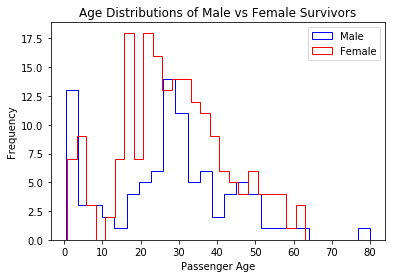

In [37]:
# Ages of male and female survivors
plt.hist(male_survivors.Age, bins = 25, color = 'blue', histtype = 'step', label = 'Male')
plt.hist(female_survivors.Age, bins = 25, color = 'red', histtype = 'step', label = 'Female')
plt.xlabel('Passenger Age')
plt.ylabel('Frequency')
plt.legend(loc = 'best')
plt.title('Age Distributions of Male vs Female Survivors');

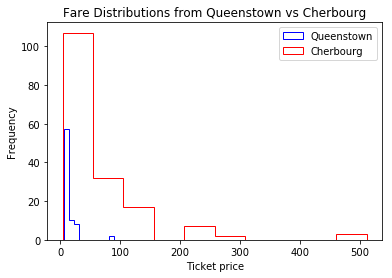

In [38]:
# Fares paid by passengers from Queenstown and passengers from Cherbourg
plt.hist(Q_passengers.Fare, bins = 10, color = 'blue', histtype = 'step', label = 'Queenstown')
plt.hist(C_passengers.Fare, bins = 10, color = 'red', histtype = 'step', label = 'Cherbourg')
plt.xlabel('Ticket price')
plt.ylabel('Frequency')
plt.legend(loc = 'best')
plt.title('Fare Distributions from Queenstown vs Cherbourg');

**Did survivors pay more for their tickets than those that did not? Use a 95% confidence level.**

In [39]:
# Define survivor/non-survivor
survivor = titanic[titanic.Survived == 1]
nonsurvivor = titanic[titanic.Survived == 0]

print("Mean Survivor Fare : {}, Mean Non-survivor Fare : {}".format(survivor.Fare.mean(), nonsurvivor.Fare.mean()))
stats.ttest_ind(a = survivor.Fare, b = nonsurvivor.Fare, equal_var = False)

Mean Survivor Fare : 48.39540760233917, Mean Non-survivor Fare : 22.117886885245877


Ttest_indResult(statistic=6.8390992590852537, pvalue=2.6993323503141236e-11)

**Did a given first-class passenger have fewer family members on board than a given third-class passenger? Use a 95% confidence level.**

In [40]:
# Create total family member column
titanic['fam_total'] = titanic.SibSp + titanic.Parch

# Identify first-class and third-class passenger groups
first_class = titanic[titanic.Pclass == 1]
third_class = titanic[titanic.Pclass == 3]

print("Mean 1st class family totals : {}".format(first_class.fam_total.mean()))
print("Mean 3rd class family totals : {}".format(third_class.fam_total.mean()))
stats.ttest_ind(a = first_class.fam_total, b = third_class.fam_total, equal_var = False)

Mean 1st class family totals : 0.7731481481481481
Mean 3rd class family totals : 1.0081466395112015


Ttest_indResult(statistic=-2.0799075748873195, pvalue=0.037907385748521927)